In [2]:
%load_ext autoreload
%autoreload 2

from PIL import Image, ImageChops, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp

from matplotlib.patches import Ellipse, Rectangle
from numpy.linalg import eig, inv
import face_recognition

from random import shuffle

from src import crop_face, get_box, is_face_good, distance_from_center, get_list_of_files

%aimport src

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'face_recognition'

## For faces with Blur

In [2]:
face_list = get_list_of_files('.//')
shuffle(face_list)
max_images = 200
# face_list = face_list[:max_images]


FileNotFoundError: [Errno 2] No such file or directory: './test/'

'./test/n002743/0086_01.jpg'

# RAW CODE

1


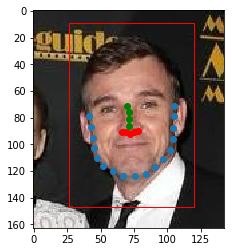

(32.28384653061378, 36.305267253176304, 62.47300455363179, -0.06437053494217998, -0.1235663082437296)


In [7]:
# image = Image.open('cropped/' + faces[51])
image = face_recognition.load_image_file(face_list[np.random.randint(0,max_images)])
# face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)
print(len(face_landmarks_list))
if face_landmarks_list:
    chin = np.array(face_landmarks_list[0]['chin'])
    nose_tip = np.array(face_landmarks_list[0]['nose_tip'])
    nose_bridge = np.array(face_landmarks_list[0]['nose_bridge'])
#     print(chin[:,0], chin[:,1])
#     print(face_landmarks_list[0].keys())
    box = np.array(get_box(nose_bridge, chin))
    plt.imshow(image)
    plt.scatter(chin[:,0], chin[:,1])
    plt.scatter(nose_tip[:,0], nose_tip[:,1], c='r')
    plt.scatter(nose_bridge[:,0], nose_bridge[:,1], c='g')
    if len(box) > 0:
        ax = plt.gca()
        draw_box = Rectangle((box[0],box[1]),
                        box[2] - box[0],
                        box[3] - box[1], 

                        fill=False, color='r')
        ax.add_patch(draw_box)
        plt.show()
else:
    plt.imshow(image)
    
print(distance_from_center(nose_bridge[0,:], chin))

In [16]:
temp = Image.fromarray(image)
temp.save('./new_.jpg')

In [16]:
count = 0
if not os.path.isdir("./cropped_fewer"):
    os.mkdir("cropped_fewer")
    print('what')
for face in face_list:
    if crop_face(face, './cropped_fewer/cropped_'+str(count)+'.jpg', box_mult=1.3):
        count += 1
    
    if count > max_images:
        break

In [32]:
face_list[0]

'./test/n004588/0055_01.jpg'